# Introduction

Within this report I will be analysing a data set called `remote_work_productivty_clean.csv` this report will be split into three parts.

- **Introduction**
  - I explain the purpose of the report, the dataset and its features along with what they represent, providing background for future analysis.

- **Part A - Significance Testing**
  - In this section, I will use a parametric statistical test to test if two sets of employees; one who met their targets; another who never. Differ in the number of hours worked.  

- **Part B - Machine Learning Models**
  - **Linear Regression Analysis**
    - I will identify a pair of numerical features from the data set that may have a linear relationship through the use of data visualisation. Once identified, I will prepare the data and use a linear regression model to see if there is correlation between the pair of numerical features. Once identified I will evaluate the models prediction along with justifying my decisions. Lastly, I will interpret the results in the context of the dataset.

  - **Logistic Regression Analysis**
    - In this section I will choose two features that may logically influence whether an employee hits their target or not. I will then use logistic regression to identify how likely or not an employee is to hit their target based on these features, I will use data visualization to explain and justify the results in the context of the dataset.

## Explanation of Data

As mentioned in the introduction, in this report we will be looking at the `remote_work_productivity.csv` data set. This data does not require data cleansing and is already cleaned. This dataset contains various features which indicate various metrics from employees that work remote these include:

- **age**
  - **Type**: Numeric
  - **Detail**: The age of a given person in years

- **job_role**
  - **Type**: Categorical
  - **Detail**: The category of a person’s job i.e. data analyst

- **internet_speed**
  - **Type**: Numeric
  - **Detail**: Internet speed in Mbps

- **distraction_level**
  - **Type**: Ordinal (1-5)
  - **Detail**: A persons self-reported distractions during work rated from 1 to 5 1 being very low and 5 very high.

- **stress_level**
  - **Type**: Numeric (0-10)
  - **Detail** Weekly stress reported by an individual; 1 being very low; 10 being very high.

- **children_at_home**
  - **Type**: Binary (0/1)
  - **Detail**: If a person has children at home; 1 if so; 0 if not.

- **meetings_per_day**
  - **Type**: Numeric
  - **Detail**: Average number of meetings per day in a given week.

- **preferred_work_time**
  - **Type**: Categorical
  - **Detail**: What time of day a person prefers; Morning; Afternoon; Evening.

- **prior_remote_experience**
  - **Type**: Binary (0/1)
  - **Detail**: 0 if not experience, 1 if experience.

- **hours_worked**
  - **Type**: Numeric
  - **Detail**: Total number of remote hours worked in a week.

- **target_met**
  - **Type**: Binary (0-1)
  - **Detail**: 0 if targets not met for the week, 1 if targets met for the week.

# Part A - Significance Testing

In this section, I will look to see if the number of remote hours work signifcantly differes between employees who meet their weekly target or not.

For this test we will be using the following features:

- **hours_worked**
- **target_met**

## Hypotheses

H₁ - There is a difference between number of hours worked and targets met.

H₀ - There is no difference between number of hours worked and targets met.

## Assumptions

Before picking an appropriate test, it’s important to note down any assumptions i've made before analysis for repeatability.

- **Assumption 1**
  - The features used are already clean and do not require cleansing.

- **Assumption 2**
  - The data is roughly normally distributed meaning that a parametric test will be used as they cater for normal distribution.

## Test Choice Justification
 We are looking to examine statistical differences within two sets of data. The first being people who met target and the second being people who never. Since my assumption is the data is normally distributed, then we need to look at parametric testing, typically when testing two groups we look to the T-Test as opposed to the Anova test. Within that there is an independent and paired T-Test, independent is when you’re testing the outcome of something between two independent groups (***hours worked and target_met***) whereas paired is when you’re testing the same group before and after i.e. a drug’s effectiveness.

 With that, the most suitable test for hours worked compared to target met is the independent T-Test as we have two categories, people who met targets and people who never. There is only two groups and they are independent and the data is normally distributed.

## Independent T-Test

Using the independent T-Test, I found there was a large difference between the numbers of hours worked compared and targets being hit. The T-Test statistic was large, showing the overall mean of employees who clocked more work hours and hit targets was higher than those who did not. Furthermore, the P value was almost 0 indicating that this was more than likely not by chance as it was below the significant P value of 0.05, thus we can reject the null hypothesis. This means there is a difference between number of hours worked and targets met.

In [58]:
import pandas as pd
from scipy.stats import ttest_ind

df = pd.read_csv('remote_work_productivity_clean.csv')

met_target = df[df['target_met'] == 1]['hours_worked']
not_met_target = df[df['target_met'] == 0]['hours_worked']

t_test, p_value = ttest_ind(met_target, not_met_target)

print(f"T-Test: {t_test}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Significant difference between the groups, therefore null hypothesis can be rejected.")
else:
    print("No significant difference between the groups, therefore we fail to reject the null hypothesis.")

T-Test: 10.136448612151565
P-Value: 6.114643306484747e-21
Significant difference between the groups, therefore null hypothesis can be rejected.


# Part B - Machine Learning

In this section I will use two methods of machine learning to gather useful insights into the dataset.

1. Linear Regression Analysis
2. Logistic Regression Analysis

## Linear Regression Analysis

Linear regression is a statistical machine learning techique, we use it to model the relationship between two variables; the independant variable's and the dependent variable. The purpose of linear regression is to understand how the dependant variable changes when the indepentand variable various allowing people/companies to predict change in linear way.

In this analysis, im going to use linear regression to explore the relationship and strength between two numerical features from the dataset. I will examine how change in one variable (indepentant) can directly impact another (dependant)

The dependant variable is the variable that is being predicted for example hours_worked. The independent variable is the variable used for that prediction for example target_met.

Linear regression is a powerful tool in machine learning that can provide valuable data forecasts and insights.

### Choice of Features

To perform linear regression, I’m going to look at two features from the dataset, logically speaking, if someone who works from home has a faster internet speed than others. Theoretically they will be more productive and efficient with less frustrations, meaning they potentially work more hours. If thats the case it could directly impact targets, and weather the get met or not. We know from significance testing that targets getting met might be impacted by hours. Thus, its benefical to find out what might impact the number of hours worked. Personally, I believe there is a strong linear relationship, between the following features:

- **internet_speed**
- **hours_worked**

To determine the state of the relationship I created a correlation matrix heatmap to visualise this relationship. On a corellation matrix the strength of a relalationship is measure from 0 - 1 where 1 is more positive and negative is less positive. In the heatmap we can see the correlation between internet_speed and hours_worked is 0.62 showing quite a strong correlation between the two, maybe internet frustration directly impacts worked hours.

Furthermore, I created a scatter plot to visualise further, it's quite interesting, we can see there is a positive linear relationship although the data is quite spread out.

In the context of remote working, we can see that there is a correlation between a person internet speed and how many hours they work. This might have a direct impact on targets met. Perhaps due to less internet frustrations, less loading times and less downtime, however this is a corellation without further analysis its hard to tell directly, machine learning would help us predict here. I wonder if this could lead a company to provide better internet to employees depending on the outcome.


Correlation Matrix Heatmap


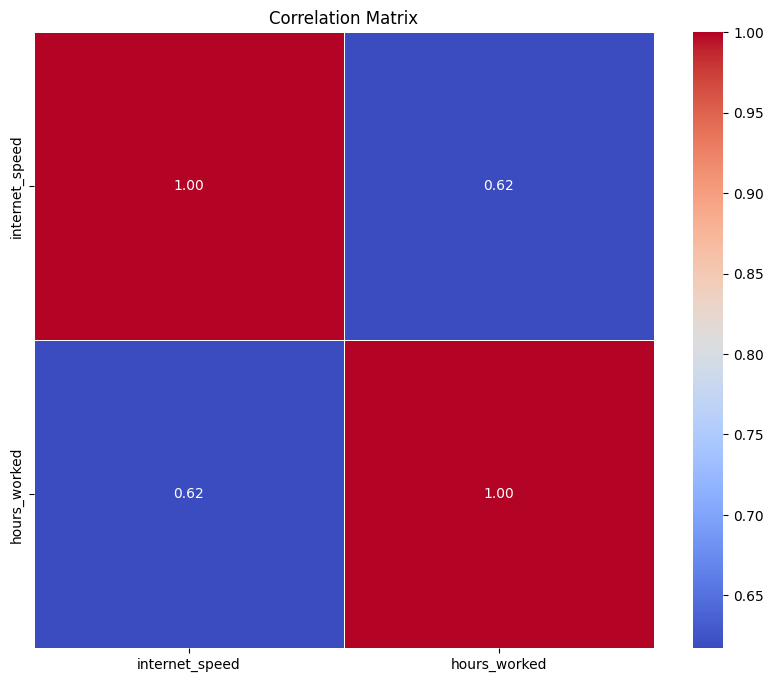



Scatter Plot


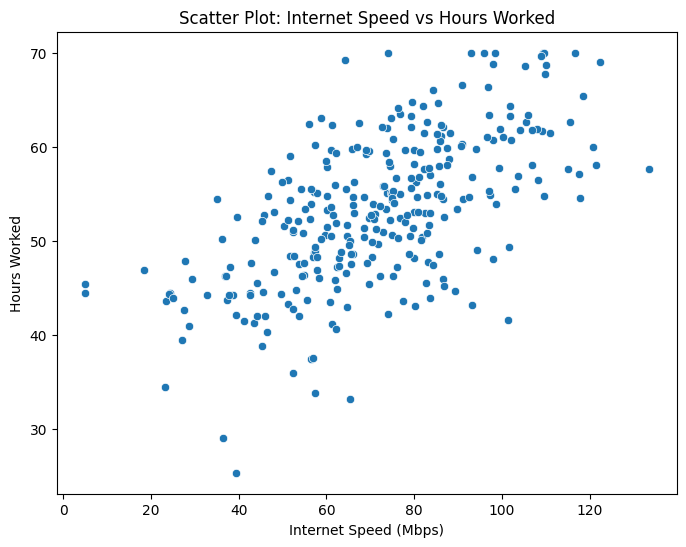

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

df_remote = pd.read_csv('remote_work_productivity_clean.csv')

df_subset = df_remote[['internet_speed', 'hours_worked']]

correlation_matrix = df_subset.corr()

print("Correlation Matrix Heatmap")
print("=============")
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
print("\n")

print("Scatter Plot")
print("=============")
plt.figure(figsize=(8, 6))
sns.scatterplot(x='internet_speed', y='hours_worked', data=df_subset)
plt.xlabel('Internet Speed (Mbps)')
plt.ylabel('Hours Worked')
plt.title('Scatter Plot: Internet Speed vs Hours Worked')
plt.show()

### Hypotheses

For the linear regression analysis section of this report, I will look at the following hypothesis:

H₁ - There is a positive relationship between internet speed and number of hours worked.

H₀ - There is no relationship between them.

### Split Data (Train + Test)

When using a linear regression model, we need a way to measure its performance, predictions and how well the model generalises, it’s easy to predict something but if we can’t provide accuracy/performance it has no basis, furthermore when tracking its performance there should be no bias.

To achieve this we split the data into two sections.

- Training Data (80%)
  - This is the data we use to train the model on; this data helps us find the best-fit line which is the line that has the smallest "error" (vertical distance to the line) to each data point.

- Test Data (20%)
  - This is a smaller portion of the dataset which is used to perform evaluations on the model after training. We use the test data to run a prediction. I.e. how many hours should someone worked base on their internet speed. Based on this we can work out the error between what the data shows compared to the prediction. Then we can choose the appropriate evaluation to discuss the findings in the correct context.

It’s important to note that an 80/20 split is not the only form of split, it could be 70/30 or less depending on the data size for example. It's not a set in stone ratio. Furthermore, there is sometimes another split for validation data often used for deep learning.

Since our data only contains 300 rows that’s why we split 80/20 as oppose to 70/30. Keeping more data for training will allow us to try and avoid underfitting (model failing to correctly capture the trend it data), thus giving better evaluations.


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats


df_remote = pd.read_csv('remote_work_productivity_clean.csv')

print("Number of rows")
print("==================")
print(f"Number of rows: {df.shape[0]}")
print("\n")

X = df_remote[['internet_speed']]
y = df_remote['hours_worked']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Data Head")
print("==================")
print(X_train.head())
print("\n")
print(y_train.head())
print("\n")

print("Test Data Head")
print("==============")
print(X_test.head())
print("\n")
print(y_test.head())

Number of rows
Number of rows: 300


Training Data Head
     internet_speed
232            84.4
59            111.0
6              43.5
185            82.8
173            57.9


232    66.050675
59     61.439307
6      41.288163
185    45.522181
173    46.923662
Name: hours_worked, dtype: float64


Test Data Head
     internet_speed
203            23.2
266            61.1
152            35.1
9              69.0
233           101.4


203    34.519706
266    53.601550
152    54.478982
9      59.211649
233    41.563163
Name: hours_worked, dtype: float64


### Initial Findings

My hypothesis was `There is a positive relationship between internet speed and number of hours worked. ` My thought process was that faster speeds allow a person to work more efficiently leading to more hours of work, thus making a straight-line prediction like linear regression the best fit for this task.

After running the training data through the model, then creating a prediction using the test data. I created a scatter plot with a prediction line. From this we can see a positive linear relationship between `internet_speed` and the `hours_worked`. It seems that as internet speed grows as does hours worked. We use scatter plots to assess the tightness between two variables, it allows us to visualise patterns and outliers making analysis insightful.

So what does this mean? the actual data points marked in blue do group around the prediction line, although there are quite a few further away perhaps an indication of a weaker connection between the features. This indicates although there is a trend, internet speed might not alone predict hours worked, other factors like part time employment could be a factor for example.

Lastly, we can see there are a few visible outliers on the plot, a few at higher speeds and a couple at lower speeds. Potentially another indicator that internet speed is not the only factor here.


Linear Regression Result


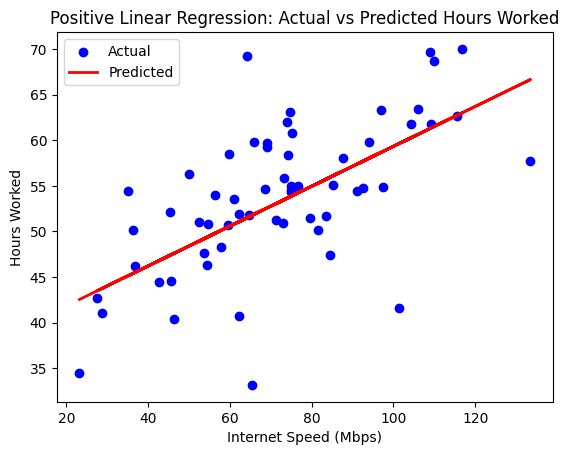

In [61]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, color='blue', label='Actual')

plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')

print("Linear Regression Result")
print("==================")
plt.xlabel('Internet Speed (Mbps)')
plt.ylabel('Hours Worked')
plt.title('Positive Linear Regression: Actual vs Predicted Hours Worked')
plt.legend()
plt.show()

### Evaluation

In order to evaluate my trained model’s prediction on hours worked we will look at the following metrics:

- R²
  - **Why**: The R² metric shows if the level or variation between the dependent variable can be explained by the independent variable or if other factors are at play. This works well for my use case because hours_worked can have various factors like a person’s contract, if they have kids or not. It’s not as simple as just internet speed, this metric will help me identify how much internet speed influences hours worked.

  - **Result**: From the results only 38% of variation of the dependant variable can be explained by the internet speed, meaning 62% could be other factors such as job title or contract etc. This shows a relatively weak link between the two features although there is some trend.

- RMSE
  - **Why**: RMSE allows us to see, on average, how far away my prediction is from my actual data value in the same units as the value you’re trying to predict i.e. an RMSE of 6 means the prediction is roughly 6 hours off the actual data, so in RMSE case the lower the better. RMSE is the square root of mse, this is useful as it allows me to see in the same units how far of the prediction line is. Which can influence if the relationship is strong or not, which, later allows us to identify if the model is valuable.

  - **Result**: From the result we can formalise our findings from the R² metric, we see a value of 6.31. This indicates a moderately weak relationship, and that the predicted hours_worked is 6 hours off on average, this perhaps tells us we might be missing key features to predict the relationship more accurately like job description.

- Residuals
  - **Why**: Residuals allow us to see if our model selection is a good fit, allowing us to better trust our findings. Residuals are the difference between the data's actual value and the predicted value. It shows us how wrong the model is for each individual data point oppose to one average metric from RMSE, a good sign is when we have a 0 line with a random spread of data points around it. A bad sign is when we see curves or patterns within the plot, this shows a model is potentially a bad or wrong fit for that dataset. Furthermore, using residuals we can if there is a potential bias, we can see if a model under or overpredicts if so, we know there might be a bias.
  
  - **Results**: We can see from plotting my residuals on a scatter plot, that the data points group around the 0 line with no real pattern or curve. Therefore, the model seems to be a good fit and we don’t have bias.

R²
R-squared: 0.3811


RMSE
RMSE: 6.313392962388753


Residuals


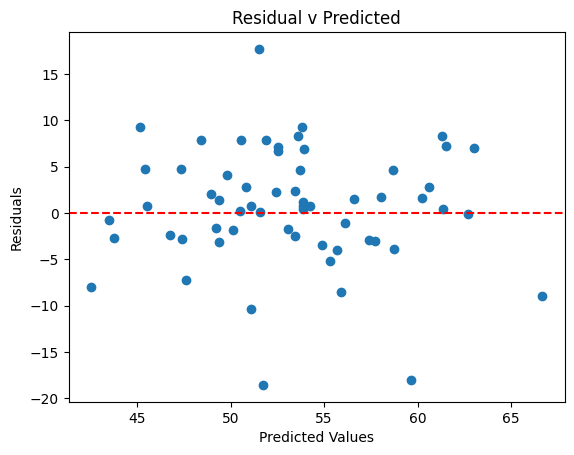

In [62]:
from sklearn.metrics import mean_squared_error, r2_score

print("R²")
print("==================")
r2 = round(r2_score(y_test, y_pred), 4)
print(f"R-squared: {r2}")
print("\n")

print("RMSE")
print("==================")
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")
print("\n")

print("Residuals")
print("==================")
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual v Predicted')
plt.show()

### K-Fold Evaluation

After basic evaluation I applied K-Fold Evaluation, this type of evaluation splits the data into 5 folds. Then the model is trained and tested on each fold. Once done we can perform normal evaluation per fold like R² or RMSE. We then can see the average across all folds.

I applied k-fold evaluation using R² and RMSE evaluations from this we see the following:

- K-Fold R²
  - The R² scores across all five folds range from 0.182 to 0.523 with an average of 0.359, indicating a weak relationship between hours_worked and internet_speed.

- K-Fold RMSE
  - The RMSE score across all five folds range from 5.525 to 7.01, the range is closer together for this metric. On average the model was 6.216 hours off.

The variation in both metrics show the model's performance is inconsistent across folds, particularly for the R² metric. This solidifies my previous findings, that internet speed alone is not enough to determine the number of hours worked by a given individual. However, there is a slight trend. Overall, through k-fold evaluation, I can confirm that the model generalizes moderately but cannot be used for precise predictions. The model could perform better if we were to include additional explanatory variables such as job title, contracted hours etc to provide better predictions in the future.

Based on this my H₁ hypotheses can be proven however the link is weak, I would not use this to form any decisions. Further analysis would be required to stregthen the hypothesis.

In [63]:
from sklearn.model_selection import cross_val_score, KFold

print("R² K-Fold")
print("==================")
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
print("R² scores per fold:", np.round(cv_scores, 3))
print(f"Average R² per folds: {np.mean(cv_scores):.3f}")
print("\n")

print("RMSE K-Fold")
print("==================")
rmse_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_root_mean_squared_error')
print("RMSE scores per fold:", np.round(rmse_scores, 3))
print(f"Average RMSE per folds: {np.mean(rmse_scores):.3f}")
print("\n")

R² K-Fold
R² scores per fold: [0.381 0.413 0.182 0.523 0.296]
Average R² per folds: 0.359


RMSE K-Fold
RMSE scores per fold: [6.313 5.525 7.01  5.761 6.472]
Average RMSE per folds: 6.216




### Strengths & Weaknesses

Linear regression is a powerful tool that allows us to predict a continuous outcome it has various strengths and weaknesses let’s look at them:

**Strengths**

- Simple and interpretable as each coefficient tells us exactly how a feature affects the target outcome, we don’t have to do any guess work.
- Fast and efficient, the math behind linear regression is simple with few parameters so on data sets with thousands of rows it’s still fast.
- Good baseline, it allows us to set a benchmark and based on that we can maybe look to more complex models, furthermore it’s super easy to start with.

**Weaknesses**

- Assumed the data is linear or roughly linear as non-linear data reduces accuracy.
- Can be sensitive to outliers, extreme values on either end can distort coefficients.
- Cannot handle categorical data, it only works for continuous targets,

## Logistic Regression Analysis

Logistic regression unlike linear regression is a classification algorithm used for binary classification (0, 1) or (success, fail) etc. Its purpose is to predict the probability of an outcome (positive class) by applying the sigmoid function to linear inputs. This function maps an input to a value that is between 0 and 1, representing the probability that an outcome belongs to the positive class. This model is useful for predicting yes/no or success/fail questions based, it can handle multiple types of features whilst providing interpretable coefficents which allows us to make data driven decisions more confidently.

Much like linear regression we have a independant variables and dependant variable within logistic regression. However, they represent slightly different things.

**Independant Variables (X)**
  - These variables represents the features/inputs we use to predict the dependant variable. These can be either numerical (continuous), binary (0/1) or categorical (only after one-hot encoding is done, which is the process of converting categorical inputs into numerical ones)

**Dependant variable (Y)**
  - This variable represents the target/outcome and is binary or categorical for example, 0/1, success/fail, yes/no.

Logistic Regression is the best fit here as the target variable (`hours_worked/`) is binary (1/0), the model will allow us to interpret probability of if a target is met or not.

I will be using logistic regression to predict if two appropriate features influence wether individuals meet targets or not.

### Choice of Features

The two features I’m going to use for this analysis is:

- `hours_worked`
- `meetings_per_day`

Arguably more meetings per day would equate to less work getting done. If you have multiple people on a call it could potentially take up unnecessary time, leading to less work getting delivered. However, on the other hand people may argue that precise meetings that have actionable outcomes improve productivity. Furthermore, logically speaking more hours worked equates to more work getting done therefore targets are met, opposed to latter.

These are interesting points; we can make a data driven decision using logistic regression to better understand if less meetings and more hours directly impacts weekly targets based on that we can provide a decision.

In order to check if these features are good test subjects, I must first look at the distribution of the data. This allows me to understand if the features have any predictive power. Furthermore, I will look at the spread of the data to see if scaling/normalisation is required to make the model fit better.  

- `Hours worked vs Target met`
  - Looking at the box plot we can see there is a higher median indicating a strong correlation between hours worked and target met, the employees who met their targets generally worked more hours (nearly 8 hours more on average). We only see one outlier in which the target was achieved with lower hours worked. Furthermore, we see a range between 25 - 70 in terms of hours.

- `Meetings per day v Target Met`
  - If we look at the box plot for meetings per day v target met, we see less meetings result in targets being met. Albeit a small difference we can see the trend. Furthermore, the spread range is around 0 - 6.


Based on the initial analysis we see a few things:

- These two features are worth exploring both show somewhat positive relationships i.e. higher the meetings the more likely the target is to be met; additonally the more hours worked the more likely the targets will be met.

- Normalisation would be useful here although not required. I would consider the ranges within the variables to be moderate 0-6 (Meetings per day) and 25 - 70 (hours worked). For logistic regression it would be better to use either a standard scaler or a min max scaler. Logistic regression is gradient based; this will work better with similar scales as it uses gradient descent to minimize the cost function (measures how well the models prediction matches the actual outcome). Furthermore, it prevents one feature from dominating the results because of its range. Lastly, normalisation here will help interpret the evaluations better as the values end up on the same scale, we can directly see which feature has a stronger effect on the probability of targets being met.

Hours worked vs Target Met
On average, people who met their targets worked 7.99 more hours.


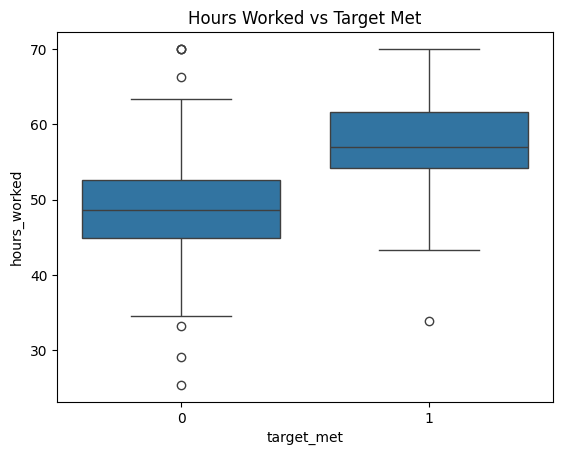



Meetings Per Day vs Target Met
On average, people who met their targets attended -0.27 fewer meetings per day.


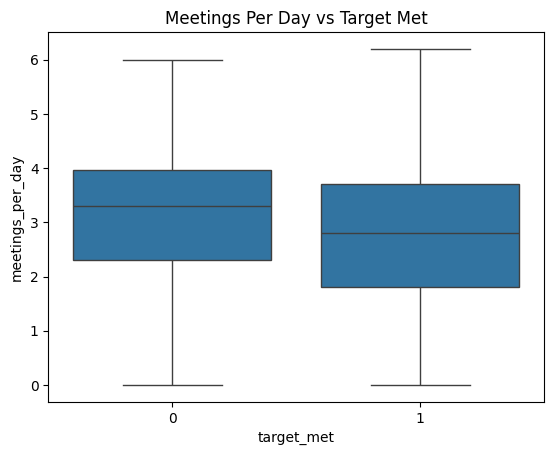

In [64]:
print("Hours worked vs Target Met")
print("==================")
sns.boxplot(x="target_met", y='hours_worked', data=df)
plt.title('Hours Worked vs Target Met')
avg_hours = df.groupby('target_met')['hours_worked'].mean()
difference = avg_hours[1] - avg_hours[0]
print(f"On average, people who met their targets worked {difference:.2f} more hours.")
plt.show()
print("\n")

print("Meetings Per Day vs Target Met")
print("==================")
sns.boxplot(x="target_met", y='meetings_per_day', data=df)
plt.title('Meetings Per Day vs Target Met')
avg_meetings = df.groupby('target_met')['meetings_per_day'].mean()
difference_meetings = avg_meetings[1] - avg_meetings[0]
print(f"On average, people who met their targets attended {difference_meetings:.2f} fewer meetings per day.")
plt.show()
print("\n")


### Hypotheses

H₁ - Both `hours_worked` and `meetings_per_day` directly influence whether an employee meets their weekly targets or not.

H₀ - Neither `hours_worked` or `meetings_per_day` influenced an employee meeting their weekly target.

### Split Data (Train + Test)

Much like linear regression we have to split the data into train and tests sets, again since we have a small number of rows 300 we will be using the 80/20 split to avoid underfitting.

When splitting data for a bivariate logistic regression analysis, we have to provide 2 features in a 2d array (x axis) and the target variable (y axis).

I then use the train_test_split with a test_size of 0.2 indicating 20% of the data is test data, we the get the split outcome which is ready for our model.

In [65]:
print("Number of rows")
print("==================")
print(f"Number of rows: {df.shape[0]}")
print("\n")

split_data = df[['hours_worked', 'meetings_per_day', 'target_met']]

X = df[['hours_worked', 'meetings_per_day']]
y = df['target_met']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training Data Head")
print("==================")
print(X_train.head())
print("\n")
print(y_train.head())
print("\n")

print("Test Data Head")
print("==============")
print(X_test.head())

Number of rows
Number of rows: 300


Training Data Head
     hours_worked  meetings_per_day
232     66.050675               1.8
59      61.439307               2.3
6       41.288163               4.9
185     45.522181               2.8
173     46.923662               5.5


232    1
59     1
6      0
185    0
173    0
Name: target_met, dtype: int64


Test Data Head
     hours_worked  meetings_per_day
203     34.519706               4.7
266     53.601550               2.2
152     54.478982               2.6
9       59.211649               2.8
233     41.563163               2.7


### Initial Findings

Linear regression outputs probabilities between 0 and 1 for the binary outcome. to visualize what this means I have created a contour plot, which allows me to illustrate the logistic regression decision surface. This plot shows a clear visual representation of how the model separates the binary outcome classes, 1 for target met and 0 for not. This is based on the two features we selected,`hours_worked` (x-axis) and `meetings_per_day` (y-axis).

**Dots and X's**

- On the plot we have 2 different colours of dots (training data) and x's (test data), red dots indicate data points that belong to the positive class (target met) and blue indicates data points that associate with the negative class (target not met).

**Class Separation**
- A contour plot has a boundary line marked as a dashed black line, this line is where the prediction boundary lies, this is a threshold of 0.5 where 0 is negative and 1 is positive.

- Anything plotted over 0.5 predicts a positive outcome, in our case 1 (Blue Area). Anything under is the negative (Red Area). In-between or close to 0.5 is the area of uncertainty (White Area).

- The gradient between red and blue shows how smooth the transition is, i.e. very light to very dark means the model switches prediction very quickly between its classes, whereas light, lighter, dark, darker indicates a smooth transition. Furthermore, the data points that are on the darkest colour either red or blue are the models’ strongest predictions.

**Features**

- `hours_worked`seems to have the strongest influence out the two features when predicting if a target is met. As the hours increase as does the probability for the positive class. The gradient follows a more gradual increase. This feature is contextually important as typically higher hours indicate higher productivity meaning a higher change of hitting a target.

- `meetings_per_day` does not seem to have the same affect. This feature does not seem to affect the probability anywhere near the same. We see a slight diagonal tilt on the boundary line in favour of the positive class, this shows that more meetings potentially does affect productivity even when a person puts in more hours. Looking at this contextually, this result means that more meetings per day may not directly link to less targets being hit, there is likely other factors influcing it.

**Uncertainty**

- As mentioned before when a model cannot with certainty predict the target outcome is 0 or 1, it places it close to 0.5, the middle of the prediction values. Represented within the white band on the plot, these data points are more likely to be misclassified (not linked to either positive or negative class). We can see this is quite common on our dataset, potentially indicating that our features are perhaps not the best for this prediction or require further features for better analysis.

**Misclassifications**

- On my plot we can see various blue and red points scattered across the opposing colour and various points in the white band. This indicate there are quite a few misclassifications further indicating the model struggles with features that don’t favour a single class like the `meetings_per_day` feature, or when the classes overlap.

I think overall, its clear to see that `hours_worked` does influence weather and employee hits a weekly target or not, indicated in the plot. However, `meetings_per_day` does not have the same influence. The model struggled to assign data points to the correct class, to fix this you would perhaps maybe need to try another model or add more informative features that may help influence the class better. The model seems to generalise quite well, which is a good indication that the model is not overfitting.

based on these findings my H₁ as some support particularly with the `hours_worked` feature. We can reject H₀ as at least on of the features correlate strongly with `target_met`.

Logistic Regression


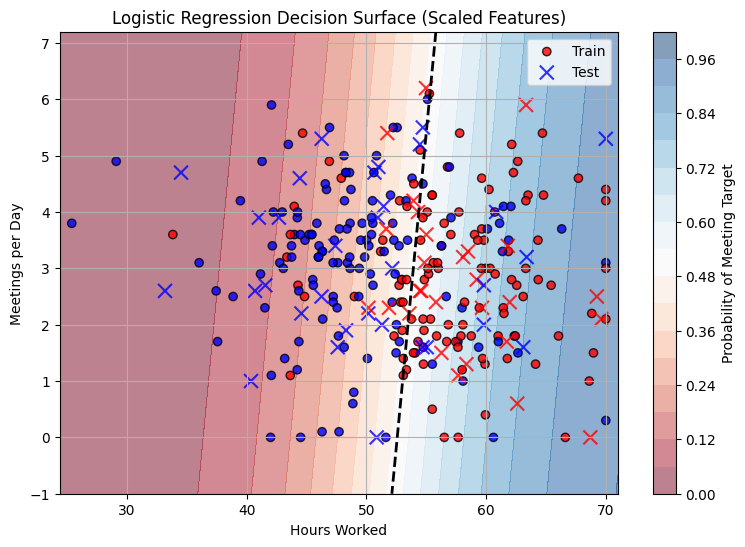

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


print("Logistic Regression")
print("==================")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

x_min, x_max = X['hours_worked'].min() - 1, X['hours_worked'].max() + 1
y_min, y_max = X['meetings_per_day'].min() - 1, X['meetings_per_day'].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

grid = np.c_[xx.ravel(), yy.ravel()]
grid_df = pd.DataFrame(grid, columns=X_train.columns)

grid_scaled = scaler.transform(grid_df)

probs = model.predict_proba(grid_scaled)[:, 1].reshape(xx.shape)

plt.figure(figsize=(9, 6))
contour = plt.contourf(xx, yy, probs, levels=15, cmap='RdBu', alpha=0.5)
plt.colorbar(contour, label='Probability of Meeting Target')

plt.contour(xx, yy, probs, levels=[0.5], colors='black', linestyles='--', linewidths=2)

plt.scatter(
    X_train['hours_worked'], X_train['meetings_per_day'],
    c=y_train, cmap='bwr', edgecolors='k', label='Train', alpha=0.8
)

plt.scatter(
    X_test['hours_worked'], X_test['meetings_per_day'],
    c=y_test, cmap='bwr', marker='x', s=100, label='Test', alpha=0.8
)

plt.xlabel("Hours Worked")
plt.ylabel("Meetings per Day")
plt.title("Logistic Regression Decision Surface (Scaled Features)")
plt.legend()
plt.grid(True)
plt.show()

### Evaluations

In order to further evaluate the models accuracy, I will be using accuracy score and a confusion matrix.

**Accuracy Score**
- This score is used to measure how many correct predictions were made from all the predictions. It gives us a sense of how well the model performed, although one of its limitations is we don’t see what class it struggled with.

**Confusion Matrix**

- A confusion matrix gives us good insights into error patterns, it shows where the model makes mistakes and across which class, it essentially provides a visualisation layer of the accuracy score, it allows us to see if the errors are across classes (unbalanced models means there could be a bias towards one class which is not good). A Confusion matrix is broken into 4 categories

  - True Positives
    - The model correctly identifies the positive class.
  - True Negatives
    - The model correctly identifies the negative class.
  - False Positives
    - The model predicted the positive class, but the actual was a negative.
  - False Negatives
    - The model predicted the negative class, but the actual was a positive.

**Evaluation Results**

We are evaluating the test set (20%) for the evaluation.

From the results we can see there was an accuracy score of 75, this shows the model accurately predicted the correct class 75% of the time, again this could be misleading, it’s an abstract number it does not tell us the balance. However, it’s an indication that the model is a good fit, not perfect though. To make more sense of the accuracy score we can look the the confusion matrix. We can see the following:

- TN (24)
  - We seen the model predict the negative class 24 times.

- TP (21)
  - We seen the model predict the positive class 21 times.

- FP (8)
  - This is the number of times the actual data point was 0 (not met) however the model predicted 1 (met). Which indicates a type 1 error. This is potentially a critical error, as the model wrongly predicts targets were met 8 times out a possible 29 which is 27% of the data. Perhaps leading to performance inflation, this could influence decision making.

- FN (7)
  - This is the opposite of FP, the number of times the actual data point was 1 (met) however the model predicted 0. Indicating a type 2 error.

Overall, we can see we have a relatively good accuracy score, looking at the confusion matrix, we can see the errors were balanced and the errors split quite evenly, furthermore the model seems as likely to make a false positive as it does a false negative. This suggests there was no significant bias to one class.

However, we can’t deem the model to be super reliable because of the number of false positives. If we were to make a data driven decision here, we would have to focus on reducing the number of false positives. We could do that a few ways, we could reduce the classification from 0.5 or selecting/adding more features that have more predictive power and pair them with `meetings_per_day` and `hours_worked`.  

Accuracy Score
Accuracy: 0.75


Confusion Matrix


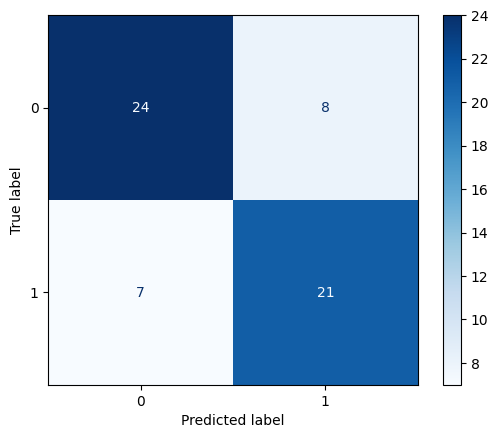

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score


print("Accuracy Score")
print("==================")
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\n")


print("Confusion Matrix")
print("==================")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

### Strengths & Weaknesses

Let’s look at the strengths and weaknesses of logistic regression.

**Strengths**
- Can use categorical and continuous features
- Backs data driven decisions by its predictive nature, i.e. we don’t just say yes/no we can see what percentage something is likely to happen.
- Easy to implement, again like linear regression it’s an easy model to implement, making it widely used with a strong foundation.

**Weaknesses**
- Sensitive to imbalanced classes, we seen balanced classes in our results however we can see the impact imbalanced classes have and if someone interprets it wrong, it can lead to costly decisions.
- More data transformation, it seems to provide better interpretation we must transform data, thus making it more complex, you must be more careful.